In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# Step 2: Load Dataset
df = pd.read_csv("Fraud_Transactions_Data.csv")
print("First 5 records:")
print(df.head())
df = df.dropna()

First 5 records:
   Transaction_ID  Customer_Age  Transaction_Amount Transaction_Type  \
0               1            35                 120           Online   
1               2            52                9500         Transfer   
2               3            28                 250              POS   
3               4            47                7000         Transfer   
4               5            39                 400           Online   

  Time_of_Day  Account_Balance  Is_Fraud  
0     Evening             5000         0  
1       Night            12000         1  
2   Afternoon             6000         0  
3       Night             8000         1  
4     Morning             7000         0  


In [10]:
# Step 3: Encode Categorical Features
type_encoder = LabelEncoder()
time_encoder = LabelEncoder()

df["Transaction_Type"] = type_encoder.fit_transform(df["Transaction_Type"])
df["Time_of_Day"] = time_encoder.fit_transform(df["Time_of_Day"])

# Step 4: Define Features & Target
X = df[["Customer_Age", "Transaction_Amount", "Transaction_Type", "Time_of_Day", "Account_Balance"]]
y = df["Is_Fraud"]

In [11]:
# Step 5: Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 7: Train Random Forest with Controlled Depth
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,            # Prevents overfitting
    min_samples_leaf=3,     # Ensures splits aren’t too small
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=200,
                       random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy: 1.0


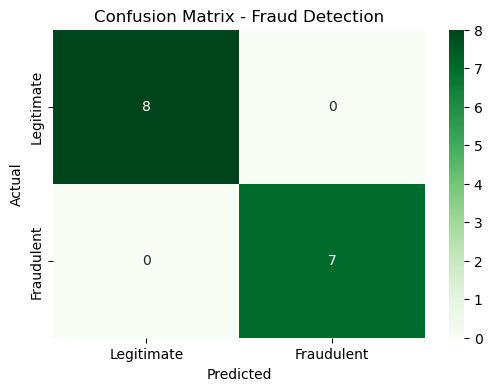

In [12]:
# Step 8: Predictions & Evaluation
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.title("Confusion Matrix - Fraud Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

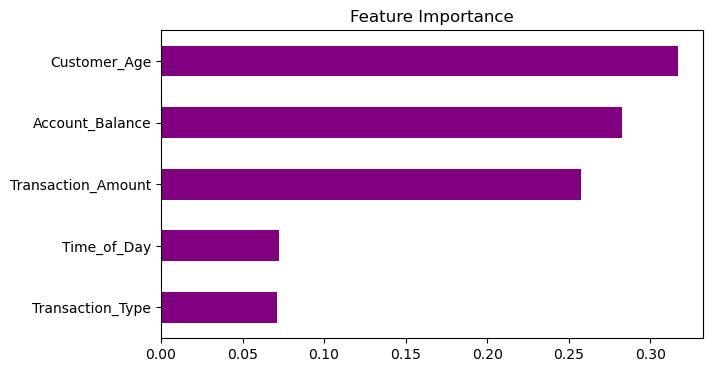

In [13]:
# Step 9: Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='purple', figsize=(7,4))
plt.title("Feature Importance")
plt.show()

In [14]:
# Step 10: Predict for New Transaction
new_transaction = pd.DataFrame({
    "Customer_Age": [45],
    "Transaction_Amount": [7500],  # smaller overlap region
    "Transaction_Type": [type_encoder.transform(["Transfer"])[0]],
    "Time_of_Day": [time_encoder.transform(["Evening"])[0]],
    "Account_Balance": [15000]
})

new_scaled = scaler.transform(new_transaction)
fraud_prob = rf_model.predict_proba(new_scaled)[0][1]
pred_class = rf_model.predict(new_scaled)[0]

print(f"\nPredicted Fraud Probability: {fraud_prob*100:.2f}%")
print("Predicted Class:", "Fraudulent" if pred_class==1 else "Legitimate")


Predicted Fraud Probability: 91.13%
Predicted Class: Fraudulent
